<a href="https://colab.research.google.com/github/SJeevitha007/User_Adoption_Analysis/blob/main/User_Adoption_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data = pd.read_csv('takehome_user_engagement.csv')
df=pd.DataFrame(data)
df.head()

,time_stamp,user_id,visited
0,2014-04-22 03:53:30,1,1
1,2013-11-15 03:45:04,2,1
2,2013-11-29 03:45:04,2,1
3,2013-12-09 03:45:04,2,1
4,2013-12-25 03:45:04,2,1


In [ ]:
df.dtypes

time_stamp    object
user_id        int64
visited        int64
dtype: object

In [ ]:
df["Timestamp"]=pd.to_datetime(df["time_stamp"]).dt.date

In [ ]:
df["user_id"].nunique()

8823

In [ ]:
three_logins = df.groupby("user_id").filter(lambda x: len(x)>=3)
three_logins.reset_index(drop=True, inplace = True)
print(three_logins)

                 time_stamp  user_id  visited   Timestamp
0       2013-11-15 03:45:04        2        1  2013-11-15
1       2013-11-29 03:45:04        2        1  2013-11-29
2       2013-12-09 03:45:04        2        1  2013-12-09
3       2013-12-25 03:45:04        2        1  2013-12-25
4       2013-12-31 03:45:04        2        1  2013-12-31
...                     ...      ...      ...         ...
200997  2014-04-20 14:22:45    11991        1  2014-04-20
200998  2014-04-25 14:22:45    11991        1  2014-04-25
200999  2014-04-28 14:22:45    11991        1  2014-04-28
201000  2014-05-17 14:22:45    11991        1  2014-05-17
201001  2014-05-30 14:22:45    11991        1  2014-05-30

[201002 rows x 4 columns]


In [ ]:
three_logins["user_id"].nunique()

2248

In [ ]:
adopted = 0
object_id = []
for i in range(len(three_logins)-2):
    user = three_logins['user_id'][i]
    if user != adopted and user == three_logins['user_id'][i+2]:
    # Get start date
        sd = pd.Timestamp(three_logins['time_stamp'][i])
        # 7 days period end date
        ed = sd + pd.Timedelta('7D')
        if sd < pd.Timestamp(three_logins['time_stamp'][i+1]) < ed and sd < pd.Timestamp(three_logins['time_stamp'][i+2]) < ed:
            object_id.append(user)
            adopted = user

In [ ]:
df1=pd.DataFrame(object_id)
df1.rename(columns={0:"object_id"},inplace=True)
df1["adopted"]=1

In [ ]:
df1.head()

,object_id,adopted
0,2,1
1,10,1
2,20,1
3,33,1
4,42,1


In [134]:
data1=pd.read_csv("takehome_users.csv",encoding='latin')
df2=pd.DataFrame(data1)
df2.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0


In [135]:
df2=df2.merge(df1[["object_id","adopted"]],on="object_id",how="left")
df2.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,adopted
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0,NaN
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0,1.0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0,NaN
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0,NaN
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0,NaN


In [136]:
df2.isnull().sum()

object_id                         0
creation_time                     0
name                              0
email                             0
creation_source                   0
last_session_creation_time     3177
opted_in_to_mailing_list          0
enabled_for_marketing_drip        0
org_id                            0
invited_by_user_id             5583
adopted                       10398
dtype: int64

In [138]:
df2["adopted"]=df2["adopted"].fillna(0)

In [139]:
df2["invited_by_user_id"]=df2["invited_by_user_id"].fillna(0)

In [ ]:
df2.isnull().sum()

object_id                        0
creation_time                    0
name                             0
email                            0
creation_source                  0
last_session_creation_time    3177
opted_in_to_mailing_list         0
enabled_for_marketing_drip       0
org_id                           0
invited_by_user_id               0
adopted                          0
dtype: int64

In [140]:
df2.dtypes

object_id                       int64
creation_time                  object
name                           object
email                          object
creation_source                object
last_session_creation_time    float64
opted_in_to_mailing_list        int64
enabled_for_marketing_drip      int64
org_id                          int64
invited_by_user_id            float64
adopted                       float64
dtype: object

In [141]:
df2.tail()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,adopted
11995,11996,2013-09-06 06:14:15,Meier Sophia,SophiaMeier@gustr.com,ORG_INVITE,1.378448e+09,0,0,89,8263.0,0.0
11996,11997,2013-01-10 18:28:37,Fisher Amelie,AmelieFisher@gmail.com,SIGNUP_GOOGLE_AUTH,1.358275e+09,0,0,200,0.0,0.0
11997,11998,2014-04-27 12:45:16,Haynes Jake,JakeHaynes@cuvox.de,GUEST_INVITE,1.398603e+09,1,1,83,8074.0,0.0
11998,11999,2012-05-31 11:55:59,Faber Annett,mhaerzxp@iuxiw.com,PERSONAL_PROJECTS,1.338638e+09,0,0,6,0.0,0.0
11999,12000,2014-01-26 08:57:12,Lima Thaís,ThaisMeloLima@hotmail.com,SIGNUP,1.390727e+09,0,1,0,0.0,0.0


In [142]:
import datetime
df2["creation_time"]=pd.to_datetime(df2["creation_time"])
#df2["last_session_creation_time"]=pd.to_datetime(df2["last_session_creation_time"],unit='s')

In [ ]:
#df2["last_session_creation_time"]=df2["last_session_creation_time"].fillna(df2["creation_time"])

In [143]:
df2=df2.drop(["name","email"],axis=1)

In [144]:
df2.head()

,object_id,creation_time,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,adopted
0,1,2014-04-22 03:53:30,GUEST_INVITE,1.398139e+09,1,0,11,10803.0,0.0
1,2,2013-11-15 03:45:04,ORG_INVITE,1.396238e+09,0,0,1,316.0,1.0
2,3,2013-03-19 23:14:52,ORG_INVITE,1.363735e+09,0,0,94,1525.0,0.0
3,4,2013-05-21 08:09:28,GUEST_INVITE,1.369210e+09,0,0,1,5151.0,0.0
4,5,2013-01-17 10:14:20,GUEST_INVITE,1.358850e+09,0,0,193,5240.0,0.0


In [145]:
df2.loc[df2.duplicated()]

,object_id,creation_time,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,adopted


Data Visualization

In [146]:
creation_source_order=df2["creation_source"].value_counts().to_frame()

In [147]:
creation_source_order.rename(columns={"creation_source":"total","index":"creation_source"},inplace=True)

In [148]:
creation_source_order["percen"]=np.round(creation_source_order.total/df2.shape[0]*100,2)

In [149]:
creation_source_order

,total,percen
ORG_INVITE,4254,35.45
GUEST_INVITE,2163,18.02
PERSONAL_PROJECTS,2111,17.59
SIGNUP,2087,17.39
SIGNUP_GOOGLE_AUTH,1385,11.54


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


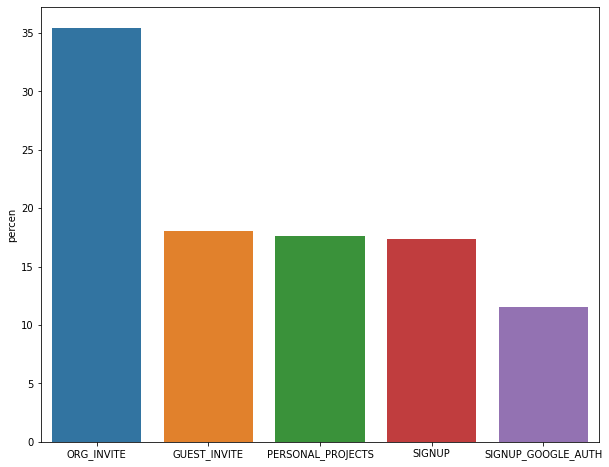

In [150]:
plt.figure(figsize=(10,8))
sns.barplot(creation_source_order.index,creation_source_order["percen"])

In [151]:
df2.groupby("opted_in_to_mailing_list")["adopted"].value_counts()

opted_in_to_mailing_list  adopted
0                         0.0        7818
                          1.0        1188
1                         0.0        2580
                          1.0         414
Name: adopted, dtype: int64

Here it's clear that the "opted_in_to_mailing_list	" columns do not have any impact on adopted users.

In [152]:
df2.groupby("enabled_for_marketing_drip")["adopted"].value_counts()

enabled_for_marketing_drip  adopted
0                           0.0        8852
                            1.0        1356
1                           0.0        1546
                            1.0         246
Name: adopted, dtype: int64

 "opted_in_to_mailing_list	" columns also do not have any impact on adopted users

Text(0, 0.5, 'No of user')

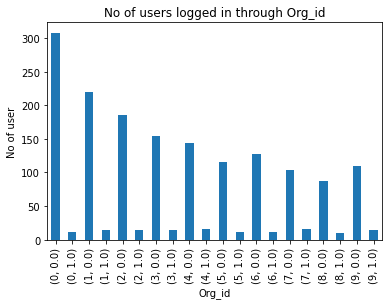

In [153]:
ax=df2.groupby("org_id")["adopted"].value_counts().head(20).plot(kind="bar",title="No of users logged in through Org_id")
ax.set_xlabel("Org_id")
ax.set_ylabel("No of user")

These are the top 10 Organization wh

In [154]:
df3=df2[df2["adopted"]==1]
df3

,object_id,creation_time,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,adopted
1,2,2013-11-15 03:45:04,ORG_INVITE,1.396238e+09,0,0,1,316.0,1.0
9,10,2013-01-16 22:08:03,ORG_INVITE,1.401833e+09,1,1,318,4143.0,1.0
19,20,2014-03-06 11:46:38,SIGNUP,1.401364e+09,0,0,58,0.0,1.0
32,33,2014-03-11 06:29:09,GUEST_INVITE,1.401518e+09,0,0,401,79.0,1.0
41,42,2012-11-11 19:05:07,SIGNUP,1.401045e+09,1,0,235,0.0,1.0
...,...,...,...,...,...,...,...,...,...
11964,11965,2014-04-25 07:17:35,GUEST_INVITE,1.400657e+09,0,0,65,11251.0,1.0
11966,11967,2014-01-12 08:12:37,GUEST_INVITE,1.401524e+09,0,0,15,5688.0,1.0
11968,11969,2013-06-01 00:48:14,GUEST_INVITE,1.401411e+09,1,1,52,6647.0,1.0
11974,11975,2013-03-23 11:10:11,GUEST_INVITE,1.400757e+09,1,0,31,6410.0,1.0


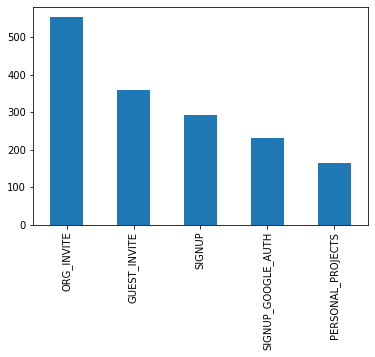

In [155]:
df3["creation_source"].value_counts().plot(kind="bar")

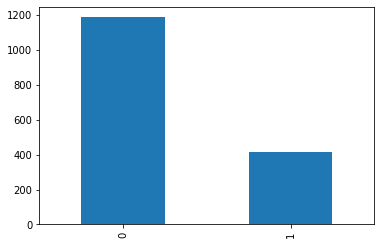

In [156]:
df3["opted_in_to_mailing_list"].value_counts().plot(kind="bar")

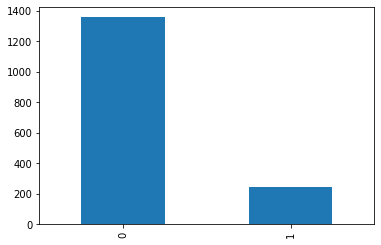

In [157]:
df3["enabled_for_marketing_drip"].value_counts().plot(kind="bar")

In [158]:
df3.drop(["opted_in_to_mailing_list","enabled_for_marketing_drip"],axis=1,inplace=True)

/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


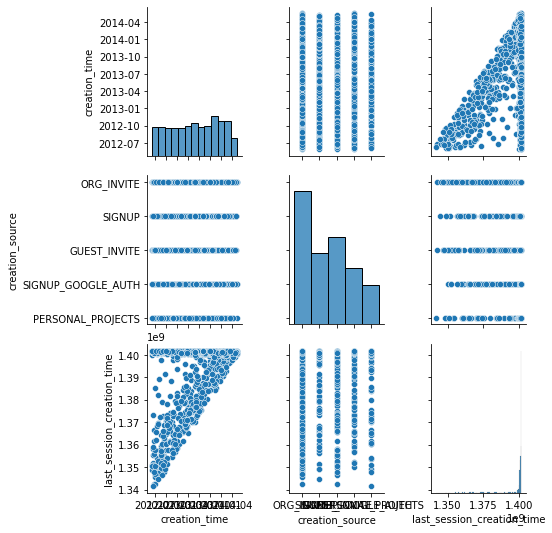

In [159]:
sns.pairplot(df3,vars=["creation_time","creation_source","last_session_creation_time"])
plt.show()

In [160]:
inv = pd.Series(np.random.randn(len(df)))
org= pd.Series(np.random.randn(len(df)))
for i in range(len(df2)):
    if df2['invited_by_user_id'][i] >=1:
        inv[i] = 1
    else:
        inv[i] = 0
    if df2['org_id'][i] >=0:
        org[i] = 1
    else:
        org[i] = 0   
df2["Invited"]=inv
df2["org"]=org

In [161]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [162]:
df2["creation_source"]=le.fit_transform(df2["creation_source"])

In [169]:
df2.head()

,object_id,creation_time,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,adopted,Invited,org
0,1,2014-04-22 03:53:30,0,1.398139e+09,1,0,11,10803.0,0.0,1.0,1.0
1,2,2013-11-15 03:45:04,1,1.396238e+09,0,0,1,316.0,1.0,1.0,1.0
2,3,2013-03-19 23:14:52,1,1.363735e+09,0,0,94,1525.0,0.0,1.0,1.0
3,4,2013-05-21 08:09:28,0,1.369210e+09,0,0,1,5151.0,0.0,1.0,1.0
4,5,2013-01-17 10:14:20,0,1.358850e+09,0,0,193,5240.0,0.0,1.0,1.0


In [176]:
df2.replace([np.inf, -np.inf], np.nan, inplace=True)
df2.fillna("0",inplace=True)

In [177]:
x=df2[["creation_source","last_session_creation_time","Invited","org","opted_in_to_mailing_list",	"enabled_for_marketing_drip"]]
y=df2.adopted

In [182]:
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import linear_model
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix

In [212]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=42)
model=RandomForestClassifier(n_estimators=40)
model.fit(x_train,y_train)

RandomForestClassifier(n_estimators=40)

In [213]:
y_pred=model.predict(x_test)
model.score(x_test,y_test)

0.8908333333333334

In [215]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 89.08%


In [216]:
cross_val_score(linear_model.LogisticRegression(),x_test,y_test)

array([0.86458333, 0.86458333, 0.86458333, 0.86458333, 0.8625    ])

In [217]:
cross_val_score(SVC(),x_test,y_test)

array([0.86458333, 0.86458333, 0.86458333, 0.86458333, 0.8625    ])

From the adopted user dataset df3, it is clear that the last login time and the Organization invite are the two features shows the future adoption of the users.

And RandomForest model is better than other models which gives accuracy around 89%.
